In [1]:
# Import packages
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import re
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
from nltk.corpus import stopwords # import other stopword library
stopwords = nltk.corpus.stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
import pandas as pd
import ngram_graphs
from textblob import TextBlob
import matplotlib.pyplot as plt
import spacy
import string
import collections

In [2]:
# load data
df = pd.read_csv("But how does bitcoin actually work.csv",delimiter=";")


In [3]:
comments_cleaned = df.Comment
comments_cleaned

0      If you see comments here about investing or br...
1      I'd recommend not just reporting, but also rep...
2                                 Thank you so much Lisa
3      Only a matter of time before scammers come her...
4      Wow I’m already seeing scams scrolling through...
                             ...                        
166    Thank you for your comment on this video, we'l...
167    The software "TeamSpeak" also uses proof of wo...
168    One of the best videos so far I have come acro...
169                                                  📞📲📩
170    Thank you very much. I have been wanting to un...
Name: Comment, Length: 171, dtype: object

In [4]:
text = ''.join(comments_cleaned) 
text = text.lower()
text = re.sub(r'==.*?==+•', '', text)
text = text.replace('’','')
text = re.sub(r'[0-9]+', '', text)
text

'if you see comments here about investing or brokers, they are scams.  videos about cryptocurrencies, evidently including ones that are just about the underlying technology/math, are hotbeds for attracting nefarious actors preying on the impressionable.also, hi!  if youre new to this channel, most of it is about visualizing math. i get it, you probably landed here searching for how btc works, not to spend your afternoon getting pulled into learning about, say, prime numbers or problem-solving, but if you have a moment take a look at the rest of the channel, you may enjoy what you find.i\'d recommend not just reporting, but also replying to them, explaining to any potential readers how their advertisement is a scam. commenting is quick, and could save somebody hundreds of dollars! :)thank you so much lisaonly a matter of time before scammers come here and give you some discounts.wow im already seeing scams scrolling through the replies to this lmao.i appreciate your efforts toward my ac

In [5]:
#text = re.sub(r'==.*?==+•', '', text)
#text = text.replace('\n', '')
#text = text.replace('\n', '')
#text = re.sub(r'[0-9]+', '', str(text))
#print(text)

In [6]:
customised_words = ['thank', 'would', 'this🌟🌟🌟', 'virtualcryptomines🟡com', 
                    'coins📲📩📩📩📩this', 'this📲📩📩📩👆👆👆fourth', 'glad', '😁✌️📲📩📩i', 
                    'net','you’re','didn’t','thespacehackers⨀com','virtualcryptomines🪐com','sincerely','utmost', 'linuxtechcorps🟡org', 'linuxtechcorps🎡org', 'linuxtechcorps','testimony']

In [7]:
# Clean text, run "python -m spacy download en" in anaconda prompt to download the nlp data
nlp = spacy.load('en_core_web_sm')
def clean_string(text, stem="None"):

    final_string = ""

    # Remove line breaks
    # Note: that this line can be augmented and used over
    # to replace any characters with nothing or a space
    text = re.sub(r'\n', '', text)

    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Remove stop words
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
    useless_words = useless_words + ['hi', 'im', 'i’m', '’', 't', 'ive'] + customised_words

    text_filtered = [word for word in text if not word in useless_words]

    # Remove numbers
    text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]

    # Stem or Lemmatize
    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    elif stem == 'Spacy':
        text_filtered = nlp(' '.join(text_filtered))
        text_stemmed = [y.lemma_ for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string

In [8]:
text_cleaned = clean_string(text, stem= 'Lem')
text_cleaned

'see comment investing broker scam video cryptocurrencies evidently including one underlying technologymath hotbed attracting nefarious actor preying impressionablealso youre new channel visualizing math get probably landed searching btc work spend afternoon getting pulled learning say prime number problemsolving moment take look rest channel may enjoy findid recommend reporting also replying explaining potential reader advertisement scam commenting quick could save somebody hundred dollar much lisaonly matter time scammer come give discountswow already seeing scam scrolling reply lmaoi appreciate effort toward account give try wasnt regretting least marketinvestmentbinary•com yeah youre right lame well mr crystal ate hamster giles lmaooooocan updated video info outdated really cool see explanation layer feature like lightning etcjesus christ like half comment replying comment watch scam scam themselvesplease make video transforms laplace fourierz transforms help many engineering stude

### Prepare Bigram Graph

In [9]:
# test networkx graphs
test = ['hello world', 'hell of a hello world', 'NLP rocks']

In [10]:
import ngram_graphs
import networkx as nx
# Create a generator for bigram graphs
# Kind can be either 'igraph' or 'networkx' (default and recommended)
generator = ngram_graphs.Generator(n=2, kind='networkx')

# Change n for trigrams
generator.set_n(2)

# Generate the graphs
# By default the generator will use character level ngrams
graphs = generator.generate_text_graphs(test, weight=0.5,wordgram=True )

# Generate a model graph from the graphs of all your documents
# It will contain all the nodes and edges in your documents
# The lr (learning rate) parameter describes how much the weights are affected by the weights
# in different graphs according to this formula : 
# weight = current_weight + ((new_weight - current_weight) * lr)
# where: 
# - current_weight is the current weight of the edge in the model graph
# - new_weight is the weight of the edge in the new document graph being added to the model graph
model_graph = ngram_graphs.utils.generate_model_graph(graphs, lr=0.5)

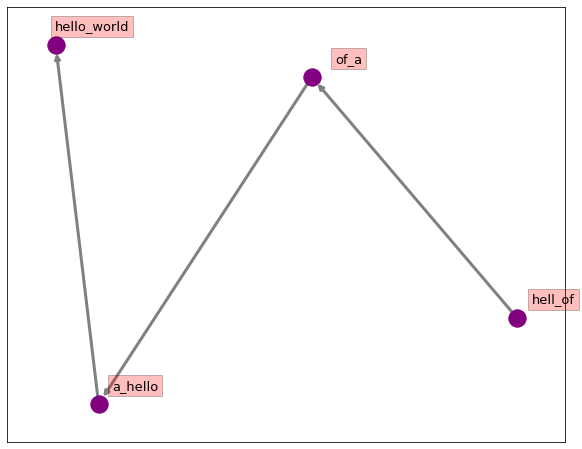

In [11]:
# Networkx Graph
fig, ax = plt.subplots(figsize=(10, 8))
pos = nx.spring_layout(model_graph, k=2)
# Plot networks
nx.draw_networkx(model_graph, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)
#Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
    s=key,
    bbox=dict(facecolor='red', alpha=0.25),
    horizontalalignment='center', fontsize=13)
    
plt.show()

In [12]:
#create n-grams
# Bigrams
X2 = []
cv2=CountVectorizer(stop_words=stopwords, ngram_range=(2, 2)) # remove stopwords with the nltk library

# Transform
X2 = cv2.fit_transform([text_cleaned])
# Create the bow representation
X2_df=pd.DataFrame(X2.toarray(), columns=cv2.get_feature_names_out())
print(X2_df.head())
bigrams = cv2.get_feature_names_out()
bigrams

   ability people  able access  able calculate  able exploit  able set  \
0               1            1               1             1         1   

   able spend  academy provided  accept latest  accepted bank  accepted one  \
0           1                 1              1              1             1   

   ...  youtube worse  youtubers oversimplifying  youve finished  youve got  \
0  ...              1                          1               1          1   

   zero believe  zero followed  zero needed  zero simple  zero since  zil nfts  
0             1              1            1            1           1         2  

[1 rows x 2780 columns]


array(['ability people', 'able access', 'able calculate', ...,
       'zero simple', 'zero since', 'zil nfts'], dtype=object)

### continued

In [13]:
text_cleaned

'see comment investing broker scam video cryptocurrencies evidently including one underlying technologymath hotbed attracting nefarious actor preying impressionablealso youre new channel visualizing math get probably landed searching btc work spend afternoon getting pulled learning say prime number problemsolving moment take look rest channel may enjoy findid recommend reporting also replying explaining potential reader advertisement scam commenting quick could save somebody hundred dollar much lisaonly matter time scammer come give discountswow already seeing scam scrolling reply lmaoi appreciate effort toward account give try wasnt regretting least marketinvestmentbinary•com yeah youre right lame well mr crystal ate hamster giles lmaooooocan updated video info outdated really cool see explanation layer feature like lightning etcjesus christ like half comment replying comment watch scam scam themselvesplease make video transforms laplace fourierz transforms help many engineering stude

In [14]:
# After the punctuation above is removed it still leaves empty entries in the list.
text_content = [s for s in text_cleaned if len(s) != 0]
nltk_tokens = nltk.word_tokenize(text_cleaned)  
bigrams_list = list(nltk.ngrams(nltk_tokens, 2))
bigrams_list

bigram_counts = collections.Counter(bigrams_list)
bigram_counts.most_common(40)

[(('block', 'chain'), 10),
 (('bit', 'hash'), 5),
 (('hash', 'per'), 5),
 (('dont', 'understand'), 4),
 (('hash', 'function'), 4),
 (('bitcoin', 'mining'), 4),
 (('per', 'second'), 4),
 (('cryptocurrency', 'market'), 4),
 (('video', 'transforms'), 3),
 (('well', 'thought'), 3),
 (('computing', 'power'), 3),
 (('mining', 'actually'), 3),
 (('cryptocurrencies', 'work'), 3),
 (('probably', 'dont'), 3),
 (('understand', 'fully'), 3),
 (('every', 'minute'), 3),
 (('proof', 'work'), 3),
 (('ever', 'seen'), 3),
 (('many', 'time'), 3),
 (('really', 'understand'), 3),
 (('dont', 'really'), 3),
 (('first', 'step'), 3),
 (('order', 'transaction'), 3),
 (('transaction', 'put'), 3),
 (('put', 'block'), 3),
 (('winning', 'lottery'), 3),
 (('true', 'transaction'), 3),
 (('virtual', 'crypto'), 3),
 (('really', 'cool'), 2),
 (('understandable', 'way'), 2),
 (('seen', 'far'), 2),
 (('one', 'best'), 2),
 (('incredibly', 'well'), 2),
 (('commit', 'fraud'), 2),
 (('certain', 'amount'), 2),
 (('mining', 'po

In [15]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(block, chain)",10
1,"(bit, hash)",5
2,"(hash, per)",5
3,"(dont, understand)",4
4,"(hash, function)",4
5,"(bitcoin, mining)",4
6,"(per, second)",4
7,"(cryptocurrency, market)",4
8,"(video, transforms)",3
9,"(well, thought)",3


In [25]:
d = bigram_df.set_index('bigram').T.to_dict('records')

In [26]:
d

[{('block', 'chain'): 10,
  ('bit', 'hash'): 5,
  ('hash', 'per'): 5,
  ('dont', 'understand'): 4,
  ('hash', 'function'): 4,
  ('bitcoin', 'mining'): 4,
  ('per', 'second'): 4,
  ('cryptocurrency', 'market'): 4,
  ('video', 'transforms'): 3,
  ('well', 'thought'): 3,
  ('computing', 'power'): 3,
  ('mining', 'actually'): 3,
  ('cryptocurrencies', 'work'): 3,
  ('probably', 'dont'): 3,
  ('understand', 'fully'): 3,
  ('every', 'minute'): 3,
  ('proof', 'work'): 3,
  ('ever', 'seen'): 3,
  ('many', 'time'): 3,
  ('really', 'understand'): 3}]

In [60]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

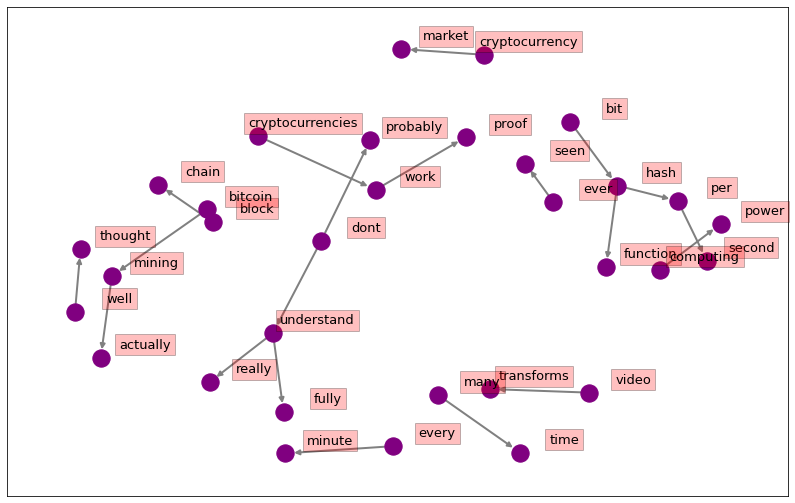

In [62]:
fig, ax = plt.subplots(figsize=(14, 9))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=14,
                 arrows=True,
                 arrowstyle='-|>',
                 width=2,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)

plt.savefig("Graph.svg", format="svg")

In [20]:
# After the punctuation above is removed it still leaves empty entries in the list.
text_content = [s for s in text_cleaned if len(s) != 0]
nltk_tokens = nltk.word_tokenize(text_cleaned)  
bigrams_list = list(nltk.ngrams(nltk_tokens, 3))
bigrams_list

bigram_counts = collections.Counter(bigrams_list)
bigram_counts.most_common(25)

[(('hash', 'per', 'second'), 4),
 (('probably', 'dont', 'understand'), 3),
 (('dont', 'understand', 'fully'), 3),
 (('idea', 'much', 'tried'), 2),
 (('much', 'tried', 'find'), 2),
 (('tried', 'find', 'article'), 2),
 (('find', 'article', 'video'), 2),
 (('article', 'video', 'actually'), 2),
 (('video', 'actually', 'explaining'), 2),
 (('actually', 'explaining', 'cryptocurrencies'), 2),
 (('explaining', 'cryptocurrencies', 'work'), 2),
 (('cryptocurrencies', 'work', 'everyone'), 2),
 (('work', 'everyone', 'else'), 2),
 (('everyone', 'else', 'go'), 2),
 (('else', 'go', 'around'), 2),
 (('go', 'around', 'analogy'), 2),
 (('around', 'analogy', 'probably'), 2),
 (('analogy', 'probably', 'dont'), 2),
 (('understand', 'fully', 'thanks'), 2),
 (('video', 'block', 'chain'), 2),
 (('hash', 'function', 'also'), 2),
 (('update', 'zil', 'nfts'), 2),
 (('crash', 'mining', 'profitability'), 2),
 (('deflationary', 'currency', 'bad'), 2),
 (('video', 'question', 'two'), 2)]

In [21]:
trigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['trigram', 'count'])

trigram_df

,trigram,count
0,"(hash, per, second)",4
1,"(probably, dont, understand)",3
2,"(dont, understand, fully)",3
3,"(idea, much, tried)",2
4,"(much, tried, find)",2
5,"(tried, find, article)",2
6,"(find, article, video)",2
7,"(article, video, actually)",2
8,"(video, actually, explaining)",2
9,"(actually, explaining, cryptocurrencies)",2


In [63]:
d = trigram_df.set_index('trigram').T.to_dict('records')

In [73]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 8))
    G.add_edge(k[1], k[2], weight=(v * 8))

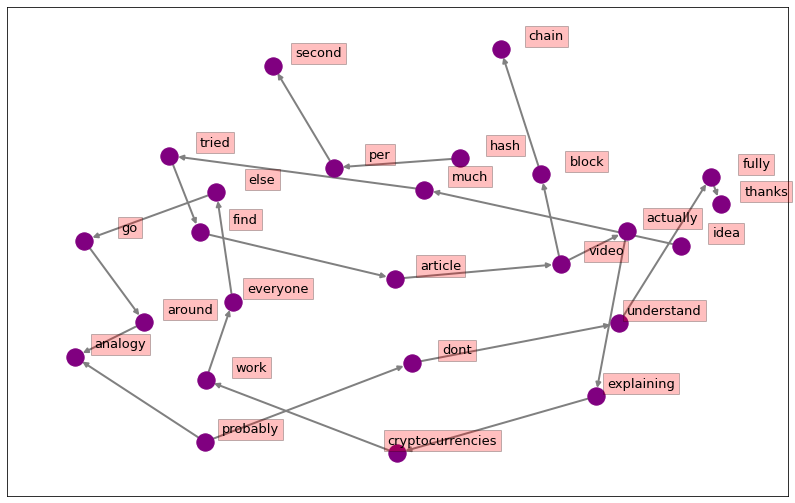

In [80]:
fig, ax = plt.subplots(figsize=(14, 9))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=12,
                 arrows=True,
                 arrowstyle='-|>',
                 width=2,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 alpha = 1,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)

plt.savefig("Graph.svg", format="svg")